In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
print(os.getcwd())


C:\Users\Dango\Documents\Fall2022\Data Science


In [2]:
df = pd.read_csv("filtered_data.csv")
print(df.shape)
print(df.info())
print(df.head())
#(6129757, 9)

(6129757, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129757 entries, 0 to 6129756
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Registration State  object
 1   Plate Type          object
 2   Violation Code      int64 
 3   Vehicle Body Type   object
 4   Vehicle Make        object
 5   Violation Precinct  int64 
 6   Violation Time      object
 7   Violation County    object
 8   Vehicle Color       object
dtypes: int64(2), object(7)
memory usage: 420.9+ MB
None
  Registration State Plate Type  Violation Code Vehicle Body Type  \
0                 NY        PAS              67               SDN   
1                 NY        PAS              51              SUBN   
2                 NJ        PAS              63               SDN   
3                 NY        PAS              63              SUBN   
4                 NJ        PAS              63               SDN   

  Vehicle Make  Violation Precinct Violation Time V

In [3]:
# question we are answering
"""
We will be building a model to see if we could predict violation 
code based on vehicle descriptions and location.
Hence, this brings the awareness where people could try to be more careful if they match description
"""

'\nWe will be building a model to see if we could predict violation \ncode based on vehicle descriptions and location.\nHence, this brings the awareness where people could try to be more careful if they match description\n'

In [4]:
# observe data
print(df.isnull().sum())
# there are only null values in the following columns
# Vehicle Body Type
# Vehicle Make
# Violation Time
# Violation County
# Vehicle Color

# number of violation in hours



Registration State         0
Plate Type                 0
Violation Code             0
Vehicle Body Type      15645
Vehicle Make            5485
Violation Precinct         0
Violation Time            66
Violation County       16403
Vehicle Color         542695
dtype: int64


In [5]:
#dropping color might because not general enough
df = df.drop(labels = 'Vehicle Color', axis = 1)
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6129757 entries, 0 to 6129756
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Registration State  object
 1   Plate Type          object
 2   Violation Code      int64 
 3   Vehicle Body Type   object
 4   Vehicle Make        object
 5   Violation Precinct  int64 
 6   Violation Time      object
 7   Violation County    object
dtypes: int64(2), object(6)
memory usage: 374.1+ MB
None
(6129757, 8)


In [6]:
# violation code -> clean this first 
#     find lower threshold and remove violation tickets that dont lower threshold
# time -> format HHMM(A/P) -> use this to categorize time
# Vehicle Maker 
# Registration State
# Plate Type
# Vehicle Body Type
# Vehicle Color
#     find lower threshold by count and remove violation tickets that dont lower threshold
#     do by count 

# reason why we decide threshold by count
# the more people that has this description, the more relevant it is
# the less people that has this description, the less relevant it is 
# in terms of reflecting general population

# Hence
# reasoning to remove lower threshold
# this is because these descriptions do not reflect the overall population as the descriptions are not common
# lower threshold does not reflect 

# reason to keep upper threshold
# the more people that follows these descriptions, the more it reflects the general population
# hence, if we to remove upper threshold, it will essentially remove a huge chunk of our data that reflects general
# population

# for example
# if a violation code 'X' has only 1 violation 
# then it does not make sense to include 'X' since it does not reflect overall population
# and if a violation code 'Y' has 1000000
# then it does make sense to include Y

# in comparison to the total number of data
# a small portion of data has None values
# also in this context, we cannot use stuff we dont know as filling the none values will introduce inaccurate values
# so we could first drop Null values as it would not have a significant impact on the data

# dropping null value
df = df.dropna()
print(df.isnull().sum())



Registration State    0
Plate Type            0
Violation Code        0
Vehicle Body Type     0
Vehicle Make          0
Violation Precinct    0
Violation Time        0
Violation County      0
dtype: int64


In [7]:
# approximately 500000 rows are removed mostly from color
print(df.shape)

(6096259, 8)


In [8]:
# drop color column


In [9]:
# inspect each column values to what needs further processing
print(df['Registration State'].unique())
# '99' do not look like a state so see how many vehicles are under this state
df = df[df['Registration State'] != '99']
print(df['Registration State'].unique())


['NY' 'NJ' 'PA' 'FL' 'OH' 'MA' 'NC' 'UT' '99' 'GA' 'TN' 'CA' 'VT' 'CT'
 'MS' 'RI' 'TX' 'MN' 'AL' 'WA' 'ME' 'AR' 'IA' 'GV' 'OK' 'MI' 'DC' 'VA'
 'ID' 'SC' 'AK' 'ON' 'MO' 'AZ' 'MD' 'LA' 'WV' 'IN' 'NH' 'DE' 'OR' 'ND'
 'NV' 'QB' 'BC' 'NM' 'HI' 'CO' 'IL' 'WI' 'MT' 'MB' 'KY' 'PR' 'NS' 'KS'
 'SD' 'NB' 'WY' 'NE' 'DP' 'AB' 'PE' 'SK' 'FO']
['NY' 'NJ' 'PA' 'FL' 'OH' 'MA' 'NC' 'UT' 'GA' 'TN' 'CA' 'VT' 'CT' 'MS'
 'RI' 'TX' 'MN' 'AL' 'WA' 'ME' 'AR' 'IA' 'GV' 'OK' 'MI' 'DC' 'VA' 'ID'
 'SC' 'AK' 'ON' 'MO' 'AZ' 'MD' 'LA' 'WV' 'IN' 'NH' 'DE' 'OR' 'ND' 'NV'
 'QB' 'BC' 'NM' 'HI' 'CO' 'IL' 'WI' 'MT' 'MB' 'KY' 'PR' 'NS' 'KS' 'SD'
 'NB' 'WY' 'NE' 'DP' 'AB' 'PE' 'SK' 'FO']


In [10]:
print(df['Plate Type'].unique())
# '999' do not look like a plate type so see how many under this and remove
df = df[df['Plate Type'] != '999']
print(df['Plate Type'].unique())
print(df['Plate Type'].value_counts())

['PAS' 'OMS' '999' 'OMT' 'SRF' 'COM' 'MED' 'ORG' 'MOT' 'TRL' 'HIS' 'SPO'
 'MCL' 'NYS' 'RGL' 'VPL' 'OMV' 'OML' 'VAS' 'HIR' 'PSD' 'HAM' 'TOW' 'SOS'
 'PHS' 'JSC' 'ITP' 'CMB' 'AGC' 'NLM' 'NYC' 'CSP' 'TRC' 'OMR' 'SEM' 'APP'
 'SRN' 'LMB' 'SCL' 'IRP' 'DLR' 'NYA' 'CHC' 'STA' 'TRA' 'LTR' 'RGC' 'ORC'
 'ARG' 'SPC' 'LMA' 'SUP' 'ATV' 'AYG' 'AMB' 'BOB' 'AGR' 'STG' 'CLG' 'CME'
 'LMC' 'OMO' 'FAR' 'CBS' 'JCA' 'MCD' 'CCK' 'CMH' 'PPH' 'OMF' 'THC' 'HSM'
 'GSM' 'WUG' 'USC' 'BOT' 'JWV' 'FPW' 'HOU' 'LUA']
['PAS' 'OMS' 'OMT' 'SRF' 'COM' 'MED' 'ORG' 'MOT' 'TRL' 'HIS' 'SPO' 'MCL'
 'NYS' 'RGL' 'VPL' 'OMV' 'OML' 'VAS' 'HIR' 'PSD' 'HAM' 'TOW' 'SOS' 'PHS'
 'JSC' 'ITP' 'CMB' 'AGC' 'NLM' 'NYC' 'CSP' 'TRC' 'OMR' 'SEM' 'APP' 'SRN'
 'LMB' 'SCL' 'IRP' 'DLR' 'NYA' 'CHC' 'STA' 'TRA' 'LTR' 'RGC' 'ORC' 'ARG'
 'SPC' 'LMA' 'SUP' 'ATV' 'AYG' 'AMB' 'BOB' 'AGR' 'STG' 'CLG' 'CME' 'LMC'
 'OMO' 'FAR' 'CBS' 'JCA' 'MCD' 'CCK' 'CMH' 'PPH' 'OMF' 'THC' 'HSM' 'GSM'
 'WUG' 'USC' 'BOT' 'JWV' 'FPW' 'HOU' 'LUA']
PAS    5047004
COM     553508


In [11]:
def find_threshold(df, column):
    """
        returns the threshold of the column where the value counts first adds up to 99% rounded
    """
    vc_list = df[column].value_counts().to_list()

    # print(len(plate_list_count))
    # print(plate_list_count)
    # # 6096259 number of violations
    total = df.shape[0]
    percentage = []
    sum = 0
    for i in vc_list:
        sum += i
        percentage.append(round((sum/total), 2) * 100)
    # # from percentage you can see that about 99 percent of data makes up with only 7 plate types

    threshold_index = 0
    for i in range(len(percentage)):
        if percentage[i] >= 80.0:
            threshold_index = i
            break

    threshold = vc_list[threshold_index]
    # # remove rows where plate types less than threshold
    return threshold

In [12]:
def remove_threshold(df, column, threshold):
    value_counts = df[column].value_counts()
    to_remove = value_counts[value_counts < threshold].index
    df = df[~df[column].isin(to_remove)]
    return df



In [13]:
def remove_threshold_all(df, columns):
    """
        given an order of 
        return df where all threshold is removed
    """
    for column in columns:
        threshold = find_threshold(df, column)
        df = remove_threshold(df, column, threshold)
    return df

In [14]:
df = remove_threshold_all(df, ['Plate Type', 'Vehicle Make', 'Violation Code'])

In [15]:
print(df.shape)
print(df['Violation Code'].value_counts())

(3302286, 8)
36    1744620
21     534701
38     232602
7      182111
40     158773
71     157755
14     150896
5      140828
Name: Violation Code, dtype: int64


In [16]:
print(df.shape)

(3302286, 8)


In [17]:
print(df.head())

   Registration State Plate Type  Violation Code Vehicle Body Type  \
26                 NY        PAS              14              SUBN   
42                 NY        PAS              14              SUBN   
44                 NY        PAS              14               SDN   
50                 NY        PAS              14               SDN   
51                 NY        PAS              14              SUBN   

   Vehicle Make  Violation Precinct Violation Time Violation County  
26        ACURA                  84          0940A                K  
42        HONDA                  42          0537P               BX  
44          BMW                  42          0744P               BX  
50        LEXUS                  52          1109A               BX  
51        LEXUS                  42          0832A               BX  


In [18]:
print(df['Vehicle Make'].value_counts())

HONDA    565098
TOYOT    452247
NISSA    386619
FORD     265171
BMW      236972
JEEP     222715
ME/BE    215975
CHEVR    188792
HYUND    160091
LEXUS    122870
ACURA    109607
SUBAR    102654
DODGE     95817
VOLKS     89765
AUDI      87893
Name: Vehicle Make, dtype: int64


In [19]:
print(df['Violation Precinct'].unique(), len(df['Violation Precinct'].unique()))
# prob nothing to be done here

[ 84  42  52 100  76  72  45  14  25 108  63 110 106  23 120  48   4  44
  66  75  43  83  62  41  69 109  47  40 122  60 111  68  61  24  50  49
 107 123   1  17 103 105  73 112 114  19  13  33  34  30  71  70  90 115
 113 102 101  88   0  79  77  67  78 121  18   6  32  10  28 104  20  46
   5  94   7  26  21  81  36  38   9  29  85 144 272 163  22 116  87  95
 164   3 805  15  56 119  65 161 136   2  96  93  80 171  91  74  35] 107


In [20]:
print(df['Violation Time'].unique(), len(df['Violation Time'].unique()))

# remove rows of string length violation time less than 5
# follow format HHMM(A/P)
hour = {'00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'}
def expression_check(time):
    # time follows HHMM A/P
    if len(time) == 5 and (time[0:2] in hour) and (time[4] == 'P' or time[4] == 'A'):
        return True
    return False

df = df[df['Violation Time'].apply(lambda x: expression_check(x))]
print(df.shape)
# too many time, standardize time

# Parts of the Day

# Morning     5 am to 12 pm (noon)

# Afternoon     12 pm to 5 pm

# Evening     5 pm to 9 pm

# Night         9 pm to 4 am

# create a new column "Violation Day" iterate through each row and 
violation_time = df["Violation Time"]

print(violation_time.shape)
violation_day = []
start_morning = 5
end_morning = 12

start_noon = 12
end_noon = 5 + 12

start_evening = 5 + 12
end_evening = 9 + 12


for i, time in enumerate(violation_time):

    hour = int(time[0:2])
    # edge case
    if(hour == 12 and time[4] == 'A'):
        hour = 0
    elif(hour != 12 and time[4] == 'P'):
        hour = hour + 12

    if hour >= start_morning and hour < end_morning:
        violation_day.append("Morning")
    elif hour >= start_noon and hour < end_noon:
        violation_day.append("Afternoon")
    elif hour >= start_evening and hour < end_evening:
        violation_day.append("Evening")
    else:
        violation_day.append("Night")

print("done")    
df["Violation Day"] = violation_day
#drop violation column, no longer need it
print(df["Violation Day"].value_counts())


violation_hour = []
for i, time in enumerate(violation_time):
    hour = int(time[0:2]) % 12
    if time[4] == 'A':
        violation_hour.append(str(hour))
    else:
        hour += 12
        violation_hour.append(str(hour))

df["Violation Hour"] = violation_hour
#drop violation column, no longer need it


['0940A' '0537P' '0744P' ... '3100P' '0004P' '.130A'] 1514
(3302281, 8)
(3302281,)
done
Morning      1396226
Afternoon     973035
Evening       469779
Night         463241
Name: Violation Day, dtype: int64


In [21]:
print(df['Violation Hour'].value_counts())

9     289853
11    280896
8     275034
12    236840
10    217455
13    201107
14    192587
15    177802
7     170337
16    164700
17    149123
18    126520
6     108235
19    100627
20     93509
21     86710
22     65445
23     64666
0      61689
1      57695
5      54416
2      45675
3      42333
4      39027
Name: Violation Hour, dtype: int64


In [22]:
print(df['Violation County'].unique(), len(df['Violation County'].unique()))
# violation county has same county but different abbreivations

county_mapping = {'NY': 'NY','BX':'BX', 'Q':'QNS', 'R':'R', 'K':'K', 'MS': 'MS', 'BK': 'BK',
           'QN': 'QNS', 'MN': 'MN', 'Kings': 'K',
           'Qns': 'QNS', 'Bronx': 'BX', 'Rich': 'R', 'ST':'ST', 'QNS':'QNS', 'ABX': 'ABX'}

df['Violation County'] = df['Violation County'].map(county_mapping)
print(df['Violation County'].unique())
print(df['Violation County'].value_counts())
#drop 'MS' and 'ABX'
df = df[df['Violation County'] != 'MS']
df = df[df['Violation County'] != 'ABX']



['K' 'BX' 'NY' 'Q' 'R' 'BK' 'QN' 'MN' 'Kings' 'Qns' 'Bronx' 'ST' 'Rich'
 'QNS'] 14
['K' 'BX' 'NY' 'QNS' 'R' 'BK' 'MN' 'ST']
QNS    1032506
BK      664062
BX      524940
K       413034
NY      326569
MN      185045
ST      133164
R        22961
Name: Violation County, dtype: int64


In [23]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3302281 entries, 26 to 6129755
Data columns (total 10 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Registration State  object
 1   Plate Type          object
 2   Violation Code      int64 
 3   Vehicle Body Type   object
 4   Vehicle Make        object
 5   Violation Precinct  int64 
 6   Violation Time      object
 7   Violation County    object
 8   Violation Day       object
 9   Violation Hour      object
dtypes: int64(2), object(8)
memory usage: 277.1+ MB
None
(3302281, 10)


In [24]:
# transport clean data to csv
df.to_csv("filtered_data2.csv", encoding='utf-8', index=False)

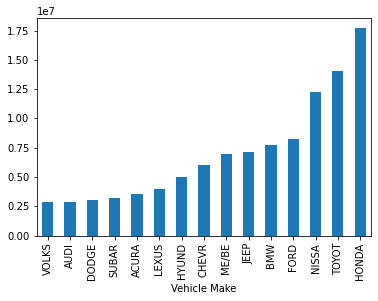

In [25]:
vehicle_violation = df.groupby('Vehicle Make')['Violation Code'].sum()
vehicle_violation.sort_values().plot(kind='bar')
plt.show()

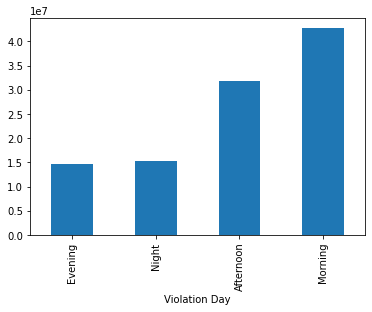

In [33]:
vehicle_day = df.groupby('Violation Day')['Violation Code'].sum()
vehicle_day.sort_values().plot(kind='bar')
plt.show()

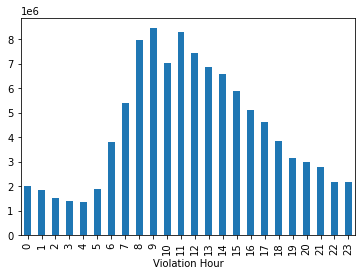

In [32]:
df['Violation Hour'] = df['Violation Hour'].apply(lambda x: int(x))

violation_hour = df.groupby('Violation Hour')['Violation Code'].sum()
violation_hour.plot(kind='bar')
plt.show()

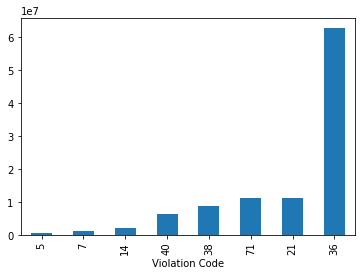

In [28]:
violation_code = df.groupby('Violation Code')['Violation Code'].sum()
violation_code.sort_values().plot(kind='bar')
plt.show()

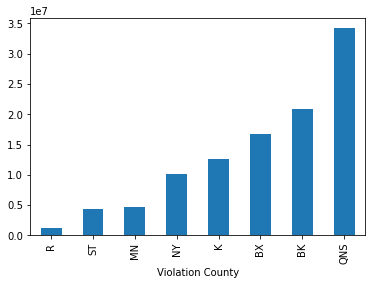

In [31]:
violation_county = df.groupby('Violation County')['Violation Code'].sum()
violation_county.sort_values().plot(kind='bar')
plt.show()